In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [ ]:
pip install tflite-support

In [ ]:
print()

In [ ]:
# Download the dataset
file_id = '1sJ1fIBtcI_plcaGRWjQrMHO7bcRMkenY'
output_file = 'Dataset.zip'
# Generate the download link
download_link = f'https://drive.google.com/uc?id={file_id}'

# Download the file
!gdown $download_link -O $output_file

Downloading...
From (original): https://drive.google.com/uc?id=1sJ1fIBtcI_plcaGRWjQrMHO7bcRMkenY
From (redirected): https://drive.google.com/uc?id=1sJ1fIBtcI_plcaGRWjQrMHO7bcRMkenY&confirm=t&uuid=02862c9a-53ba-441b-8578-e504c5812876
To: /content/Dataset.zip
100% 190M/190M [00:06<00:00, 29.7MB/s]


In [ ]:
!unzip /content/Dataset.zip

Archive:  /content/Dataset.zip
  inflating: test.csv                
  inflating: test/miner/1100.jpg     
  inflating: test/miner/1101.jpg     
  inflating: test/miner/1102.jpg     
  inflating: test/miner/1103.jpg     
  inflating: test/miner/1104.jpg     
  inflating: test/miner/1105.jpg     
  inflating: test/miner/1106.jpg     
  inflating: test/miner/1107.jpg     
  inflating: test/miner/1108.jpg     
  inflating: test/miner/1109.jpg     
  inflating: test/miner/1110.jpg     
  inflating: test/miner/1111.jpg     
  inflating: test/miner/1112.jpg     
  inflating: test/miner/1113.jpg     
  inflating: test/miner/1114.jpg     
  inflating: test/miner/1115.jpg     
  inflating: test/miner/1128.jpg     
  inflating: test/miner/1129.jpg     
  inflating: test/miner/1130.jpg     
  inflating: test/miner/1131.jpg     
  inflating: test/miner/1132.jpg     
  inflating: test/miner/1133.jpg     
  inflating: test/miner/1134.jpg     
  inflating: test/miner/1135.jpg     
  inflating: test/m

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from PIL import Image
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = "/content/train/"
test_dir = "/content/test/"

In [ ]:
def check_and_remove_corrupt_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            try:
                img_path = os.path.join(root, file)
                img = Image.open(img_path)  # Membuka gambar
                img.verify()               # Memeriksa validitas gambar
            except (IOError, SyntaxError, Image.UnidentifiedImageError) as e:
                print(f"File rusak ditemukan dan dihapus: {img_path}")
                os.remove(img_path)       # Menghapus file gambar jika rusak

check_and_remove_corrupt_images(train_dir)
check_and_remove_corrupt_images(test_dir)


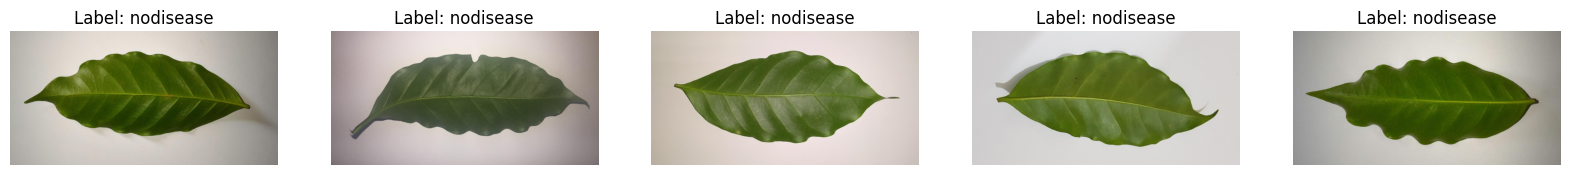

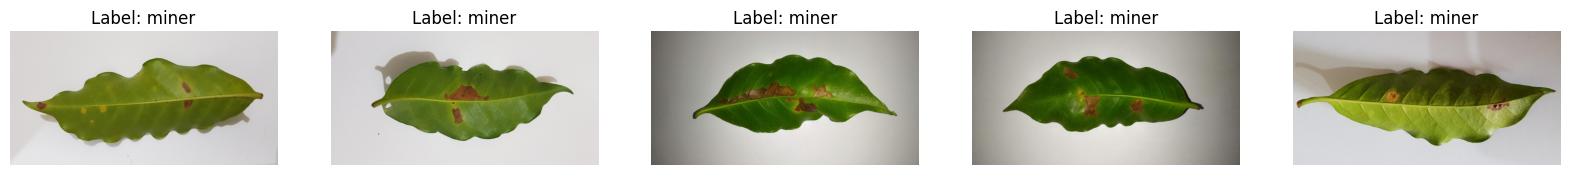

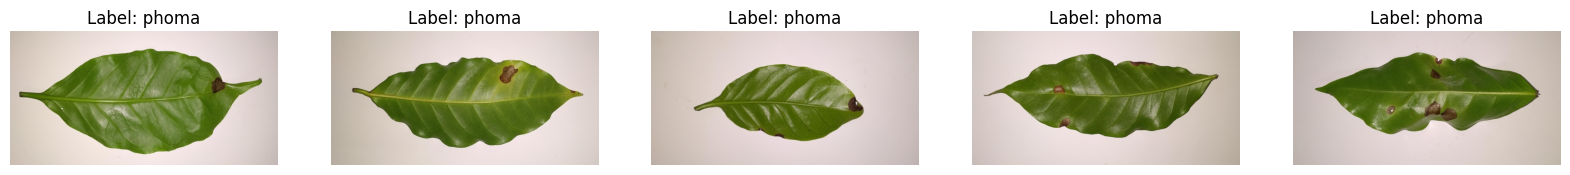

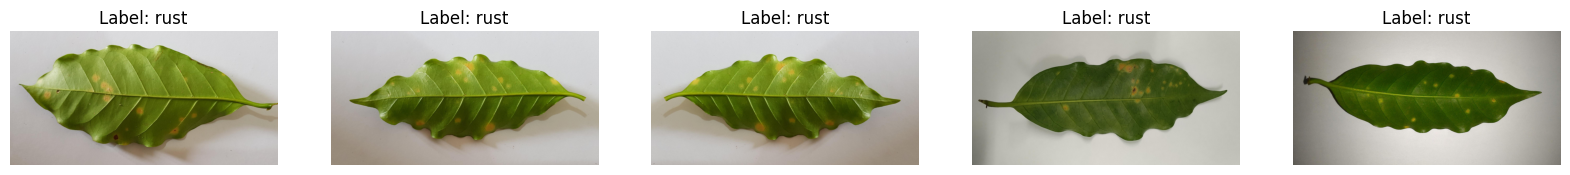

In [ ]:
# Loop untuk setiap folder (label) dalam direktori utama
for label_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, label_name)

    # Mengecek hanya folder yang berisi gambar
    if os.path.isdir(class_dir):
        class_images = os.listdir(class_dir)

        # Menampilkan 5 gambar pertama dari setiap folder label
        plt.figure(figsize=(20, 4))
        for i, img_path in enumerate(class_images[:5]):
            sp = plt.subplot(1, 5, i+1)
            img = plt.imread(os.path.join(class_dir, img_path))
            plt.imshow(img)
            plt.axis('off')  # Menghilangkan axis
            plt.title(f"Label: {label_name}")  # Menampilkan nama label sebagai judul
        plt.show()

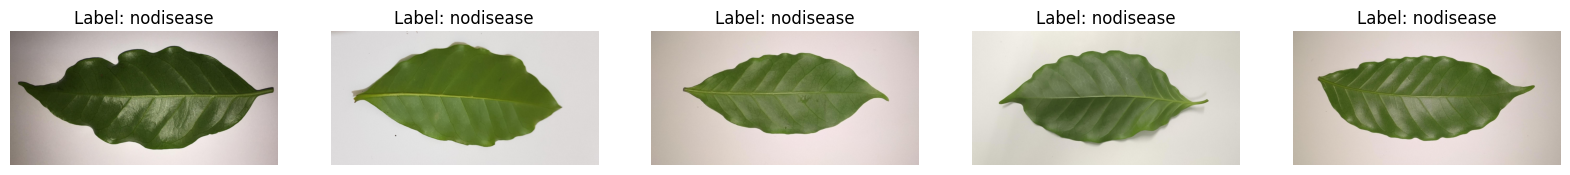

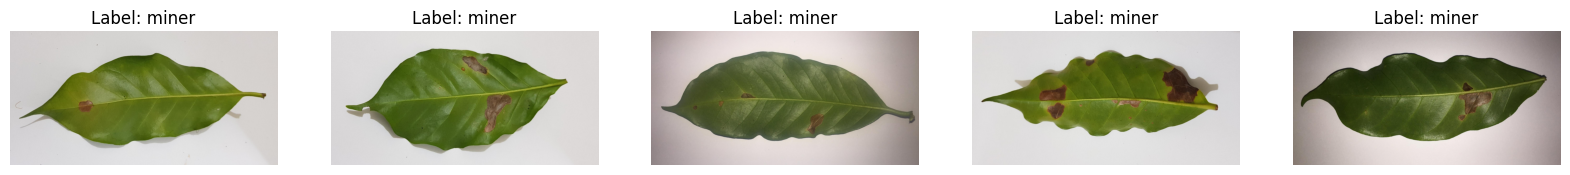

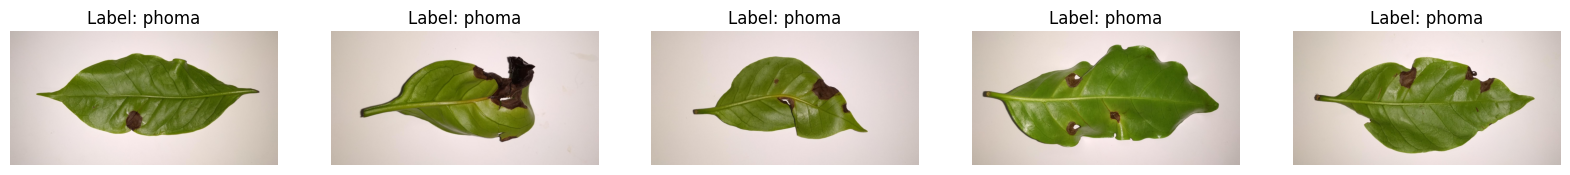

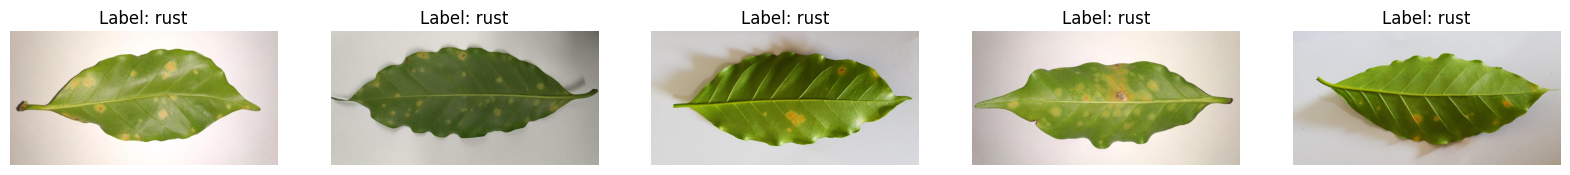

In [ ]:
# Loop untuk setiap folder (label) dalam direktori utama
for label_name in os.listdir(test_dir):
    class_dir = os.path.join(test_dir, label_name)

    # Mengecek hanya folder yang berisi gambar
    if os.path.isdir(class_dir):
        class_images = os.listdir(class_dir)

        # Menampilkan 5 gambar pertama dari setiap folder label
        plt.figure(figsize=(20, 4))
        for i, img_path in enumerate(class_images[:5]):
            sp = plt.subplot(1, 5, i+1)
            img = plt.imread(os.path.join(class_dir, img_path))
            plt.imshow(img)
            plt.axis('off')  # Menghilangkan axis
            plt.title(f"Label: {label_name}")  # Menampilkan nama label sebagai judul
        plt.show()

In [ ]:
# Membuat generator untuk data pelatihan dengan augmentasi
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,          # Rotasi gambar acak
    width_shift_range=0.2,      # Geser gambar secara horizontal
    height_shift_range=0.2,     # Geser gambar secara vertikal
    shear_range=0.2,            # Shear transformation
    zoom_range=0.2,             # Zoom in/out
    horizontal_flip=True,       # Membalik gambar secara horizontal
    fill_mode='nearest',        # Mengisi piksel yang hilang
    validation_split=0.2
)

# Membuat generator untuk data pengujian (tanpa augmentasi)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Memuat data pelatihan
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

# Memuat data pengujian
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Tidak diacak untuk evaluasi
)

Found 1013 images belonging to 4 classes.
Found 251 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [ ]:
#jumlah data untuk data pelatihan
train_size = 0.8
len(train_generator)*train_size

25.6

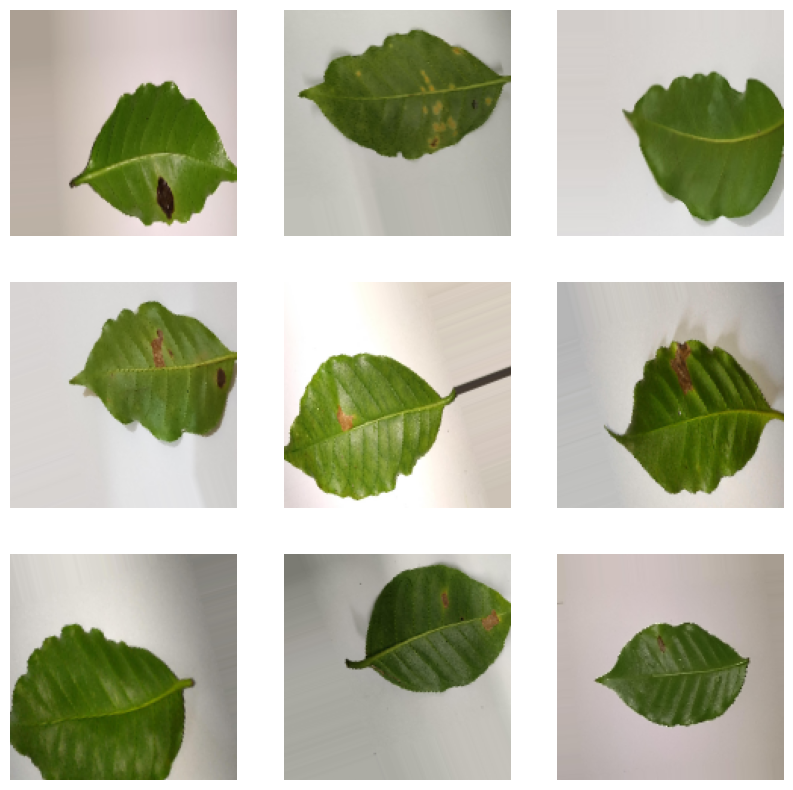

In [ ]:
# Menampilkan beberapa gambar augmentasi
x_batch, y_batch = next(train_generator)

# Mengatur tampilan gambar
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.axis("off")
plt.show()

In [ ]:
def create_model():
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')  # Jumlah kelas
    ])
    model.compile(
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

    return model


In [ ]:
# Menyusun model
model = create_model()
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 0.95 and logs.get('val_accuracy') >= 0.8:
            # Stop training
            self.model.stop_training = True
            print("\nReached 95% train accuracy and 80% validation accuracy, so cancelling training!")



In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    callbacks = [EarlyStoppingCallback()],
    epochs=30
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.2602 - loss: 1.8149 - val_accuracy: 0.3267 - val_loss: 1.3848
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.3082 - loss: 1.3767 - val_accuracy: 0.3068 - val_loss: 1.3547
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.3345 - loss: 1.3616 - val_accuracy: 0.3426 - val_loss: 1.3201
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.3793 - loss: 1.3114 - val_accuracy: 0.3506 - val_loss: 1.3248
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.4169 - loss: 1.2580 - val_accuracy: 0.4223 - val_loss: 1.2305
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.4704 - loss: 1.1104 - val_accuracy: 0.5219 - val_loss: 1.0911
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.5254 - loss: 1.0540 - val_accuracy: 0.5060 - val_loss: 1.1027
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.5344 - loss: 1.0334 - val_accuracy: 0.6056 - val_loss: 0.8968
Epo

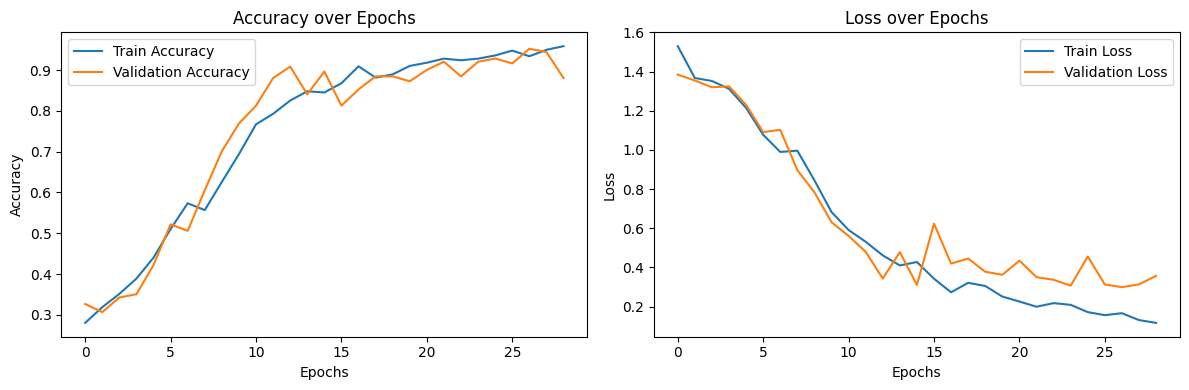

In [ ]:
def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot training history
plot_training_history(history)

In [ ]:
class_indices = train_generator.class_indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

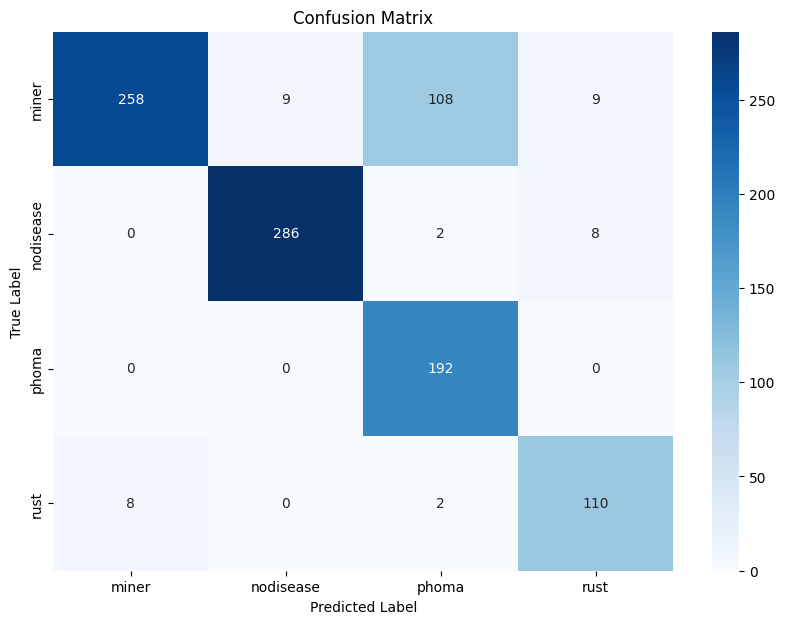

              precision    recall  f1-score   support

       miner       0.97      0.67      0.79       384
   nodisease       0.97      0.97      0.97       296
       phoma       0.63      1.00      0.77       192
        rust       0.87      0.92      0.89       120

    accuracy                           0.85       992
   macro avg       0.86      0.89      0.86       992
weighted avg       0.89      0.85      0.85       992



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have a test_generator for your test data
y_true = []
y_pred = []

# Collect true labels and predicted labels
for i in range(test_generator.batch_size):
    x_batch, y_batch = next(test_generator)  # Get the next batch of images and labels
    y_true.extend(np.argmax(y_batch, axis=1))  # True labels
    predictions = model.predict(x_batch)
    predicted_classes = np.argmax(predictions, axis=1)  # Predicted labels
    y_pred.extend(predicted_classes)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(class_indices.keys()), yticklabels=list(class_indices.keys()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report for additional metrics
print(classification_report(y_true, y_pred, target_names=list(class_indices.keys())))

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_preprocess_image(img_path):
    # Memuat gambar dan mengubah ukurannya
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)  # Mengubah gambar menjadi array numpy
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Menambah dimensi dan merescale
    return img_array

In [ ]:
from sklearn.metrics import classification_report
def predict_image_with_accuracy(model, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)  # Melakukan prediksi

    # Mendapatkan indeks kelas dengan probabilitas tertinggi
    predicted_class_index = np.argmax(predictions, axis=1)
    predicted_class_probability = predictions[0][predicted_class_index[0]]

    # Mendapatkan nama kelas
    class_indices = train_generator.class_indices
    class_labels = {v: k for k, v in class_indices.items()}  # Membalik dictionary untuk mendapatkan nama kelas

    predicted_class_name = class_labels[predicted_class_index[0]]

    return predicted_class_name, predicted_class_probability,

# Contoh penggunaan
img_path = '/content/train/rust/651.jpg'  # Ganti dengan path ke gambar yang ingin diprediksi
predicted_class_name, predicted_class_probability = predict_image_with_accuracy(model, img_path)


print(f'Predicted Class: {predicted_class_name}')
print(f'Prediction Probability: {predicted_class_probability:.2f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Class: rust
Prediction Probability: 1.00


In [ ]:
# Save the model to an HDF5 file
model.save('my_model.h5')

In [ ]:
from google.colab import files
files.download("my_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load the Keras model
model = tf.keras.models.load_model('my_model.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert the model
tflite_model = converter.convert()

# Define the directory where you want to save the TFLite model
output_directory = 'tflite_models'

# Create the directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Save the TensorFlow Lite model to a specified directory
tflite_model_path = os.path.join(output_directory, 'my_model.tflite')
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f'TensorFlow Lite model saved to: {tflite_model_path}')

Saved artifact at '/tmp/tmpi0etdvz1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  139793388606160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139793388611088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139793388655664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139793388657072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139793388663760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139793388769472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139793388773520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139793388774400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139793388778976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139793388779680: TensorSpec(shape=(), dtype=tf.resource, name=None)
TensorFlow Lite m

In [ ]:
from tflite_support.metadata_writers import image_classifier
from tflite_support.metadata_writers import writer_utils

ImageClassifierWriter = image_classifier.MetadataWriter

_MODEL_PATH = "tflite_models/my_model.tflite"
_LABEL_FILE = "tflite_models/label.txt"
_SAVE_TO_PATH = "tflite_models/model.tflite"

_INPUT_NORM_MEAN = 127.5
_INPUT_NORM_STD = 127.5

# Create the metadata writer.
writer = ImageClassifierWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), [_INPUT_NORM_MEAN], [_INPUT_NORM_STD],
    [_LABEL_FILE])

# Verify the metadata generated by the metadata writer.
print(writer.get_metadata_json())


# Populate the metadata into the model.
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)

{
  "name": "ImageClassifier",
  "description": "Identify the most prominent object in the image from a known set of categories.",
  "subgraph_metadata": [
    {
      "input_tensor_metadata": [
        {
          "name": "image",
          "description": "Input image to be classified.",
          "content": {
            "content_properties_type": "ImageProperties",
            "content_properties": {
              "color_space": "RGB"
            }
          },
          "process_units": [
            {
              "options_type": "NormalizationOptions",
              "options": {
                "mean": [
                  127.5
                ],
                "std": [
                  127.5
                ]
              }
            }
          ],
          "stats": {
            "max": [
              1.0
            ],
            "min": [
              -1.0
            ]
          }
        }
      ],
      "output_tensor_metadata": [
        {
          "name": "proba